In [1]:
#Installs
!pip3 install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 KB 36.3 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
#Librerias
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import time
from datetime import timedelta
import math
import re
import plotly.express as px
import seaborn as sns
sns.set()

In [3]:
df_Apriori = pd.read_excel('/work/Delcavideograpghy_Consolidado_priori.xlsx', index_col= 'Unnamed: 0')
df_Apriori

,nombre_video,fecha_publicacion,visualizaciones,tiempo_de_visualizacion_(horas),suscriptores,tus_ingresos_estimados_(usd),impresiones,porcentaje_de_clics_de_las_impresiones_(%),nombre_video_original,info_videos,...,porc_min_recom2,porc_min_recom3,porc_min_publi1,porc_min_publi2,porc_min_publi3,porc_min_publi4,porc_min_publi5,porc_min_publi6,porc_min_publi7,porc_min_publi8
0,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutorial ▶,20210902,1322,55.4837,1,1.359,62872,0.87,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutoria...,"1 año 6 minutos y 46 segundos 1,322 visitas",...,0.858407,0.862832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cómo CONVERTIR CLIPS DE VIDEO a GIF ANIMADOS ...,20210601,2344,95.3512,5,2.184,33250,4.18,Cómo CONVERTIR CLIPS DE VIDEO a GIF ANIMADOS u...,"1 año 11 minutos y 54 segundos 2,337 visitas",...,0.904948,0.907552,0.361979,0.496094,0.700521,0.851562,NaN,NaN,NaN,NaN
2,Cómo CREAR una TARJETA de NEGOCIOS VIRTUAL 💳 ...,20210525,3078,390.6325,35,7.989,57793,2.98,Cómo CREAR una TARJETA de NEGOCIOS VIRTUAL 💳 P...,"1 año 35 minutos 3,077 visitas",...,0.991920,0.994772,0.089829,0.206749,0.345057,0.464354,0.610741,0.743346,0.854563,0.991445
3,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW...,20220427,5283,225.6908,15,5.929,65191,4.37,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW ...,"6 meses 9 minutos y 51 segundos 5,292 visitas",...,0.919003,NaN,0.367601,0.702492,0.919003,NaN,NaN,NaN,NaN,NaN
4,Si USAS esta TÉCNICA 🧐 puedes CREAR muchos LO...,20211019,3034,200.6775,15,5.123,82848,1.88,Si USAS esta TÉCNICA 🧐 puedes CREAR muchos LOG...,"1 año 11 minutos y 55 segundos 3,058 visitas",...,0.905195,0.907792,0.287013,0.494805,0.785714,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,🧐 El Proceso de DISEÑO de LOGOS _DEFINITIVO_ ...,20210930,1675,90.6025,11,2.262,42833,1.47,"🧐 El Proceso de DISEÑO de LOGOS ""DEFINITIVO"" e...","1 año 9 minutos y 57 segundos 1,676 visitas",...,0.885321,0.888379,0.397554,0.636086,NaN,NaN,NaN,NaN,NaN,NaN
120,🧐 La TABLETA GRÁFICA más BARATA y VENDIDA ¿M...,20211111,2181,113.9934,13,4.175,35105,3.59,🧐 La TABLETA GRÁFICA más BARATA y VENDIDA ¿Mer...,"11 meses 10 minutos 2,247 visitas",...,0.970000,0.973333,0.206667,0.675000,0.965000,NaN,NaN,NaN,NaN,NaN
121,🧐 PRESTA mucha ATENCIÓN a estos DETALLES para...,20220120,3571,240.4057,32,4.020,111927,1.45,🧐 PRESTA mucha ATENCIÓN a estos DETALLES para ...,"9 meses 16 minutos 3,635 visitas",...,0.937381,0.939279,0.231499,0.313093,0.562619,0.895636,NaN,NaN,NaN,NaN
122,🧐 Sigue ESTE ORDEN en tus PROYECTOS ⭐ para CRE...,20220303,2188,159.1404,5,2.787,88772,0.95,🧐 Sigue ESTE ORDEN en tus PROYECTOS ⭐ para CRE...,"7 meses 20 minutos 2,199 visitas",...,0.960380,0.961965,0.195721,0.400158,0.543582,0.771791,0.815372,NaN,NaN,NaN


Marca Exito 1 = Porc Visualizacion >= Med(Porc Visualizacion)
Marca Exito 2 = Click impresiones >= 3% 

In [4]:
df_Apriori.columns

Index(['nombre_video', 'fecha_publicacion', 'visualizaciones',
       'tiempo_de_visualizacion_(horas)', 'suscriptores',
       'tus_ingresos_estimados_(usd)', 'impresiones',
       'porcentaje_de_clics_de_las_impresiones_(%)', 'nombre_video_original',
       'info_videos', 'duracion_video', 'page_links', 'id', 'dateCreated',
       'likes', 'dislikes', 'rating', 'viewCount', 'Tema',
       'Cant_Recomendaciones', 'Tiempo_Recomendación1',
       'Tiempo_Recomendación2', 'Tiempo_Recomendación3', 'minutos_recom1',
       'minutos_recom2', 'minutos_recom3', 'Publicidad_inicio',
       'Publicidad_fin', 'Cant_Publicidad_durante', 'Tiempo_Publicidad_1',
       'Tiempo_Publicidad_2', 'Tiempo_Publicidad_3', 'Tiempo_Publicidad_4',
       'Tiempo_Publicidad_5', 'Tiempo_Publicidad_6', 'Tiempo_Publicidad_7',
       'Tiempo_Publicidad_8', 'Polarity', 'minutos_publi1', 'minutos_publi2',
       'minutos_publi3', 'minutos_publi4', 'minutos_publi5', 'minutos_publi6',
       'minutos_publi7', 'minutos_

In [5]:
#df_Apriori.drop([column for column in df_Apriori.columns if 'Tiempo' in column], axis = 1, inplace = True)
df_Apriori.drop(['page_links'], axis = 1, inplace = True)
df_Apriori.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 123
Data columns (total 74 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   nombre_video                                124 non-null    object        
 1   fecha_publicacion                           124 non-null    int64         
 2   visualizaciones                             124 non-null    int64         
 3   tiempo_de_visualizacion_(horas)             124 non-null    float64       
 4   suscriptores                                124 non-null    int64         
 5   tus_ingresos_estimados_(usd)                124 non-null    float64       
 6   impresiones                                 124 non-null    int64         
 7   porcentaje_de_clics_de_las_impresiones_(%)  124 non-null    float64       
 8   nombre_video_original                       124 non-null    object        
 9   info_video

In [6]:
df_Subs = pd.read_csv('/work/data_consolidada/datos_grafico/df_data_grafico_estado_suscripcion.csv')
df_Agrupada = df_Subs.groupby(by= ["nombre_video"])
df_fechas_consulta=df_Agrupada.agg({"fecha":"max"})
df_fechas_consulta.reset_index(inplace=True)
df_fechas_consulta.columns = df_fechas_consulta.columns.str.replace('fecha', 'fecha_consulta')
df_fechas_consulta

,nombre_video,fecha_consulta
0,CÓMO VECTORIZAR PAISAJES_ Tutorial práctico,2022-10-30
1,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutorial ▶,2022-10-30
2,Cómo CONVERTIR CLIPS DE VIDEO a GIF ANIMADOS ...,2022-10-30
3,Cómo CREAR una TARJETA de NEGOCIOS VIRTUAL 💳 ...,2022-10-30
4,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW...,2022-10-29
...,...,...
142,🧐 La TABLETA GRÁFICA más BARATA y VENDIDA ¿M...,2022-10-10
143,🧐 PRESTA mucha ATENCIÓN a estos DETALLES para...,2022-10-11
144,🧐 Sigue ESTE ORDEN en tus PROYECTOS ⭐ para CRE...,2022-10-10
145,🧐 Te ENSEÑO estas TÉCNICAS de DIBUJO para DI...,2022-10-10


In [7]:
df_Apriori_Norm = df_Apriori.merge(df_fechas_consulta, how='inner', on='nombre_video')
df_Apriori_Norm

,nombre_video,fecha_publicacion,visualizaciones,tiempo_de_visualizacion_(horas),suscriptores,tus_ingresos_estimados_(usd),impresiones,porcentaje_de_clics_de_las_impresiones_(%),nombre_video_original,info_videos,...,porc_min_recom3,porc_min_publi1,porc_min_publi2,porc_min_publi3,porc_min_publi4,porc_min_publi5,porc_min_publi6,porc_min_publi7,porc_min_publi8,fecha_consulta
0,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutorial ▶,20210902,1322,55.4837,1,1.359,62872,0.87,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutoria...,"1 año 6 minutos y 46 segundos 1,322 visitas",...,0.862832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-30
1,Cómo CONVERTIR CLIPS DE VIDEO a GIF ANIMADOS ...,20210601,2344,95.3512,5,2.184,33250,4.18,Cómo CONVERTIR CLIPS DE VIDEO a GIF ANIMADOS u...,"1 año 11 minutos y 54 segundos 2,337 visitas",...,0.907552,0.361979,0.496094,0.700521,0.851562,NaN,NaN,NaN,NaN,2022-10-30
2,Cómo CREAR una TARJETA de NEGOCIOS VIRTUAL 💳 ...,20210525,3078,390.6325,35,7.989,57793,2.98,Cómo CREAR una TARJETA de NEGOCIOS VIRTUAL 💳 P...,"1 año 35 minutos 3,077 visitas",...,0.994772,0.089829,0.206749,0.345057,0.464354,0.610741,0.743346,0.854563,0.991445,2022-10-30
3,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW...,20220427,5283,225.6908,15,5.929,65191,4.37,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW ...,"6 meses 9 minutos y 51 segundos 5,292 visitas",...,NaN,0.367601,0.702492,0.919003,NaN,NaN,NaN,NaN,NaN,2022-10-29
4,Si USAS esta TÉCNICA 🧐 puedes CREAR muchos LO...,20211019,3034,200.6775,15,5.123,82848,1.88,Si USAS esta TÉCNICA 🧐 puedes CREAR muchos LOG...,"1 año 11 minutos y 55 segundos 3,058 visitas",...,0.907792,0.287013,0.494805,0.785714,NaN,NaN,NaN,NaN,NaN,2022-10-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,🧐 El Proceso de DISEÑO de LOGOS _DEFINITIVO_ ...,20210930,1675,90.6025,11,2.262,42833,1.47,"🧐 El Proceso de DISEÑO de LOGOS ""DEFINITIVO"" e...","1 año 9 minutos y 57 segundos 1,676 visitas",...,0.888379,0.397554,0.636086,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-29
119,🧐 La TABLETA GRÁFICA más BARATA y VENDIDA ¿M...,20211111,2181,113.9934,13,4.175,35105,3.59,🧐 La TABLETA GRÁFICA más BARATA y VENDIDA ¿Mer...,"11 meses 10 minutos 2,247 visitas",...,0.973333,0.206667,0.675000,0.965000,NaN,NaN,NaN,NaN,NaN,2022-10-10
120,🧐 PRESTA mucha ATENCIÓN a estos DETALLES para...,20220120,3571,240.4057,32,4.020,111927,1.45,🧐 PRESTA mucha ATENCIÓN a estos DETALLES para ...,"9 meses 16 minutos 3,635 visitas",...,0.939279,0.231499,0.313093,0.562619,0.895636,NaN,NaN,NaN,NaN,2022-10-11
121,🧐 Sigue ESTE ORDEN en tus PROYECTOS ⭐ para CRE...,20220303,2188,159.1404,5,2.787,88772,0.95,🧐 Sigue ESTE ORDEN en tus PROYECTOS ⭐ para CRE...,"7 meses 20 minutos 2,199 visitas",...,0.961965,0.195721,0.400158,0.543582,0.771791,0.815372,NaN,NaN,NaN,2022-10-10


In [8]:
df_Apriori_Norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 122
Data columns (total 75 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   nombre_video                                123 non-null    object        
 1   fecha_publicacion                           123 non-null    int64         
 2   visualizaciones                             123 non-null    int64         
 3   tiempo_de_visualizacion_(horas)             123 non-null    float64       
 4   suscriptores                                123 non-null    int64         
 5   tus_ingresos_estimados_(usd)                123 non-null    float64       
 6   impresiones                                 123 non-null    int64         
 7   porcentaje_de_clics_de_las_impresiones_(%)  123 non-null    float64       
 8   nombre_video_original                       123 non-null    object        
 9   info_video

In [9]:
df_Apriori_Norm['dias_publi_a_cons'] = 0

for rows in range(len(df_Apriori_Norm['likes'])):
    df_Apriori_Norm.at[rows,'dias_publi_a_cons'] = (datetime.strptime(df_Apriori_Norm.iloc[rows]['fecha_consulta'], "%Y-%m-%d") - df_Apriori_Norm.iloc[rows]['fecha_publicacion_ff']).days

df_Apriori_Norm

,nombre_video,fecha_publicacion,visualizaciones,tiempo_de_visualizacion_(horas),suscriptores,tus_ingresos_estimados_(usd),impresiones,porcentaje_de_clics_de_las_impresiones_(%),nombre_video_original,info_videos,...,porc_min_publi1,porc_min_publi2,porc_min_publi3,porc_min_publi4,porc_min_publi5,porc_min_publi6,porc_min_publi7,porc_min_publi8,fecha_consulta,dias_publi_a_cons
0,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutorial ▶,20210902,1322,55.4837,1,1.359,62872,0.87,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutoria...,"1 año 6 minutos y 46 segundos 1,322 visitas",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-30,423
1,Cómo CONVERTIR CLIPS DE VIDEO a GIF ANIMADOS ...,20210601,2344,95.3512,5,2.184,33250,4.18,Cómo CONVERTIR CLIPS DE VIDEO a GIF ANIMADOS u...,"1 año 11 minutos y 54 segundos 2,337 visitas",...,0.361979,0.496094,0.700521,0.851562,NaN,NaN,NaN,NaN,2022-10-30,516
2,Cómo CREAR una TARJETA de NEGOCIOS VIRTUAL 💳 ...,20210525,3078,390.6325,35,7.989,57793,2.98,Cómo CREAR una TARJETA de NEGOCIOS VIRTUAL 💳 P...,"1 año 35 minutos 3,077 visitas",...,0.089829,0.206749,0.345057,0.464354,0.610741,0.743346,0.854563,0.991445,2022-10-30,523
3,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW...,20220427,5283,225.6908,15,5.929,65191,4.37,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW ...,"6 meses 9 minutos y 51 segundos 5,292 visitas",...,0.367601,0.702492,0.919003,NaN,NaN,NaN,NaN,NaN,2022-10-29,185
4,Si USAS esta TÉCNICA 🧐 puedes CREAR muchos LO...,20211019,3034,200.6775,15,5.123,82848,1.88,Si USAS esta TÉCNICA 🧐 puedes CREAR muchos LOG...,"1 año 11 minutos y 55 segundos 3,058 visitas",...,0.287013,0.494805,0.785714,NaN,NaN,NaN,NaN,NaN,2022-10-10,356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,🧐 El Proceso de DISEÑO de LOGOS _DEFINITIVO_ ...,20210930,1675,90.6025,11,2.262,42833,1.47,"🧐 El Proceso de DISEÑO de LOGOS ""DEFINITIVO"" e...","1 año 9 minutos y 57 segundos 1,676 visitas",...,0.397554,0.636086,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-29,394
119,🧐 La TABLETA GRÁFICA más BARATA y VENDIDA ¿M...,20211111,2181,113.9934,13,4.175,35105,3.59,🧐 La TABLETA GRÁFICA más BARATA y VENDIDA ¿Mer...,"11 meses 10 minutos 2,247 visitas",...,0.206667,0.675000,0.965000,NaN,NaN,NaN,NaN,NaN,2022-10-10,333
120,🧐 PRESTA mucha ATENCIÓN a estos DETALLES para...,20220120,3571,240.4057,32,4.020,111927,1.45,🧐 PRESTA mucha ATENCIÓN a estos DETALLES para ...,"9 meses 16 minutos 3,635 visitas",...,0.231499,0.313093,0.562619,0.895636,NaN,NaN,NaN,NaN,2022-10-11,264
121,🧐 Sigue ESTE ORDEN en tus PROYECTOS ⭐ para CRE...,20220303,2188,159.1404,5,2.787,88772,0.95,🧐 Sigue ESTE ORDEN en tus PROYECTOS ⭐ para CRE...,"7 meses 20 minutos 2,199 visitas",...,0.195721,0.400158,0.543582,0.771791,0.815372,NaN,NaN,NaN,2022-10-10,221


In [10]:
df_temp_1 = df_Apriori_Norm[['porcentaje_de_clics_de_las_impresiones_(%)','tiempo_de_visualizacion_(horas)','tus_ingresos_estimados_(usd)','impresiones','likes', 'dislikes']].div(df_Apriori_Norm.visualizaciones, axis=0)
df_temp_1

,porcentaje_de_clics_de_las_impresiones_(%),tiempo_de_visualizacion_(horas),tus_ingresos_estimados_(usd),impresiones,likes,dislikes
0,0.000658,0.041970,0.001028,47.558245,0.059758,0.001513
1,0.001783,0.040679,0.000932,14.185154,0.031997,0.003413
2,0.000968,0.126911,0.002596,18.776153,0.051982,0.002599
3,0.000827,0.042720,0.001122,12.339769,0.017036,0.000000
4,0.000620,0.066143,0.001689,27.306526,0.070534,0.002307
...,...,...,...,...,...,...
118,0.000878,0.054091,0.001350,25.571940,0.069851,0.001791
119,0.001646,0.052267,0.001914,16.095828,0.039431,0.000917
120,0.000406,0.067322,0.001126,31.343321,0.008121,0.000000
121,0.000434,0.072733,0.001274,40.572212,0.050731,0.001371


In [11]:
df_temp_2 = df_Apriori_Norm[['nombre_video','fecha_publicacion']]
df_temp_3 = pd.concat([df_temp_2, df_temp_1], axis=1, join="inner")
df_temp_3

,nombre_video,fecha_publicacion,porcentaje_de_clics_de_las_impresiones_(%),tiempo_de_visualizacion_(horas),tus_ingresos_estimados_(usd),impresiones,likes,dislikes
0,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutorial ▶,20210902,0.000658,0.041970,0.001028,47.558245,0.059758,0.001513
1,Cómo CONVERTIR CLIPS DE VIDEO a GIF ANIMADOS ...,20210601,0.001783,0.040679,0.000932,14.185154,0.031997,0.003413
2,Cómo CREAR una TARJETA de NEGOCIOS VIRTUAL 💳 ...,20210525,0.000968,0.126911,0.002596,18.776153,0.051982,0.002599
3,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW...,20220427,0.000827,0.042720,0.001122,12.339769,0.017036,0.000000
4,Si USAS esta TÉCNICA 🧐 puedes CREAR muchos LO...,20211019,0.000620,0.066143,0.001689,27.306526,0.070534,0.002307
...,...,...,...,...,...,...,...,...
118,🧐 El Proceso de DISEÑO de LOGOS _DEFINITIVO_ ...,20210930,0.000878,0.054091,0.001350,25.571940,0.069851,0.001791
119,🧐 La TABLETA GRÁFICA más BARATA y VENDIDA ¿M...,20211111,0.001646,0.052267,0.001914,16.095828,0.039431,0.000917
120,🧐 PRESTA mucha ATENCIÓN a estos DETALLES para...,20220120,0.000406,0.067322,0.001126,31.343321,0.008121,0.000000
121,🧐 Sigue ESTE ORDEN en tus PROYECTOS ⭐ para CRE...,20220303,0.000434,0.072733,0.001274,40.572212,0.050731,0.001371


In [12]:
df_Subs.columns

Index(['fecha', 'estado_de_suscripcion', 'visualizaciones',
       'fecha_publicacion', 'nombre_video'],
      dtype='object')

In [13]:
dias_a_analizar = 0
df_Subs['fecha_publicacion_ff'] = pd.to_datetime(df_Subs['fecha_publicacion'].astype(str), format='%Y%m%d') 
df_Subs['fecha_analisis'] = pd.to_datetime(df_Subs['fecha_publicacion'].astype(str), format='%Y%m%d') + timedelta(days=dias_a_analizar)
#dfTest = df_Subs.groupby(['nombre_video', 'fecha','fecha_publicacion_ff', 'fecha_analisis'])['visualizaciones'].sum()
df_Subs_diasAnalizar = df_Subs.loc[(df_Subs.fecha >= df_Subs.fecha_publicacion_ff) & (df_Subs.fecha <= df_Subs.fecha_analisis)]
df_Subs_diasAnalizar

,fecha,estado_de_suscripcion,visualizaciones,fecha_publicacion,nombre_video,fecha_publicacion_ff,fecha_analisis
29,2021-08-26,Suscrito,269,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...,2021-08-26,2021-08-26
489,2021-08-26,No suscrito,57,20210826,🔗 LOGO TUTORIAL CorelDRAW ›BASIC‹ Tips & Trick...,2021-08-26,2021-08-26
976,2022-07-12,Suscrito,246,20220712,⭐ SOLO HAZ un PAR de TRAZOS para obtener MÚLT...,2022-07-12,2022-07-12
1174,2022-07-12,No suscrito,40,20220712,⭐ SOLO HAZ un PAR de TRAZOS para obtener MÚLT...,2022-07-12,2022-07-12
1325,2022-06-29,Suscrito,155,20220629,⚡ PRUEBA FLEXCLIP 2022 y CREA VIDEOS para YOU...,2022-06-29,2022-06-29
...,...,...,...,...,...,...,...
115443,2021-10-21,No suscrito,42,20211021,✒️ + 🐧Aprende a COMBINAR CONCEPTOS 😏 para DISE...,2021-10-21,2021-10-21
115820,2021-07-29,Suscrito,232,20210729,🔥 CorelDRAW AMAZING Techniques for Beginners &...,2021-07-29,2021-07-29
116301,2021-07-29,No suscrito,78,20210729,🔥 CorelDRAW AMAZING Techniques for Beginners &...,2021-07-29,2021-07-29
116768,2021-04-20,Suscrito,163,20210420,🔴 Cómo funciona la PERSPECTIVA de 2 PUNTOS de...,2021-04-20,2021-04-20


In [14]:
dias_a_analizar = 2

dfSubs_nomr2 = df_Subs.copy()

df_Subs['fecha_publicacion_ff'] = pd.to_datetime(df_Subs['fecha_publicacion'].astype(str), format='%Y%m%d') 
df_Subs['fecha_analisis'] = pd.to_datetime(df_Subs['fecha_publicacion'].astype(str), format='%Y%m%d') + timedelta(days=dias_a_analizar)
df_Subs_diasAnalizar = df_Subs.loc[(df_Subs.fecha >= df_Subs.fecha_publicacion_ff) & (df_Subs.fecha <= df_Subs.fecha_analisis)]

df_Apriori_Norm2 = df_Apriori_Norm.copy()

df_Apriori_Norm2['vistas_' + str(dias_a_analizar) + '_dias'] = 0

for rows in range(len(df_Apriori_Norm2['likes'])):
    df_Apriori_Norm2.at[rows, 'vistas_' + str(dias_a_analizar) + '_dias'] = df_Subs_diasAnalizar.loc[
    df_Subs_diasAnalizar['nombre_video']==df_Apriori_Norm2.iloc[rows]['nombre_video'], ['visualizaciones']].sum(axis=0)

df_Apriori_Norm2

,nombre_video,fecha_publicacion,visualizaciones,tiempo_de_visualizacion_(horas),suscriptores,tus_ingresos_estimados_(usd),impresiones,porcentaje_de_clics_de_las_impresiones_(%),nombre_video_original,info_videos,...,porc_min_publi2,porc_min_publi3,porc_min_publi4,porc_min_publi5,porc_min_publi6,porc_min_publi7,porc_min_publi8,fecha_consulta,dias_publi_a_cons,vistas_2_dias
0,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutorial ▶,20210902,1322,55.4837,1,1.359,62872,0.87,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutoria...,"1 año 6 minutos y 46 segundos 1,322 visitas",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-30,423,677
1,Cómo CONVERTIR CLIPS DE VIDEO a GIF ANIMADOS ...,20210601,2344,95.3512,5,2.184,33250,4.18,Cómo CONVERTIR CLIPS DE VIDEO a GIF ANIMADOS u...,"1 año 11 minutos y 54 segundos 2,337 visitas",...,0.496094,0.700521,0.851562,NaN,NaN,NaN,NaN,2022-10-30,516,268
2,Cómo CREAR una TARJETA de NEGOCIOS VIRTUAL 💳 ...,20210525,3078,390.6325,35,7.989,57793,2.98,Cómo CREAR una TARJETA de NEGOCIOS VIRTUAL 💳 P...,"1 año 35 minutos 3,077 visitas",...,0.206749,0.345057,0.464354,0.610741,0.743346,0.854563,0.991445,2022-10-30,523,672
3,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW...,20220427,5283,225.6908,15,5.929,65191,4.37,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW ...,"6 meses 9 minutos y 51 segundos 5,292 visitas",...,0.702492,0.919003,NaN,NaN,NaN,NaN,NaN,2022-10-29,185,728
4,Si USAS esta TÉCNICA 🧐 puedes CREAR muchos LO...,20211019,3034,200.6775,15,5.123,82848,1.88,Si USAS esta TÉCNICA 🧐 puedes CREAR muchos LOG...,"1 año 11 minutos y 55 segundos 3,058 visitas",...,0.494805,0.785714,NaN,NaN,NaN,NaN,NaN,2022-10-10,356,1318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,🧐 El Proceso de DISEÑO de LOGOS _DEFINITIVO_ ...,20210930,1675,90.6025,11,2.262,42833,1.47,"🧐 El Proceso de DISEÑO de LOGOS ""DEFINITIVO"" e...","1 año 9 minutos y 57 segundos 1,676 visitas",...,0.636086,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-29,394,721
119,🧐 La TABLETA GRÁFICA más BARATA y VENDIDA ¿M...,20211111,2181,113.9934,13,4.175,35105,3.59,🧐 La TABLETA GRÁFICA más BARATA y VENDIDA ¿Mer...,"11 meses 10 minutos 2,247 visitas",...,0.675000,0.965000,NaN,NaN,NaN,NaN,NaN,2022-10-10,333,497
120,🧐 PRESTA mucha ATENCIÓN a estos DETALLES para...,20220120,3571,240.4057,32,4.020,111927,1.45,🧐 PRESTA mucha ATENCIÓN a estos DETALLES para ...,"9 meses 16 minutos 3,635 visitas",...,0.313093,0.562619,0.895636,NaN,NaN,NaN,NaN,2022-10-11,264,1611
121,🧐 Sigue ESTE ORDEN en tus PROYECTOS ⭐ para CRE...,20220303,2188,159.1404,5,2.787,88772,0.95,🧐 Sigue ESTE ORDEN en tus PROYECTOS ⭐ para CRE...,"7 meses 20 minutos 2,199 visitas",...,0.400158,0.543582,0.771791,0.815372,NaN,NaN,NaN,2022-10-10,221,1107


In [15]:
df_Apriori_Norm2.columns

Index(['nombre_video', 'fecha_publicacion', 'visualizaciones',
       'tiempo_de_visualizacion_(horas)', 'suscriptores',
       'tus_ingresos_estimados_(usd)', 'impresiones',
       'porcentaje_de_clics_de_las_impresiones_(%)', 'nombre_video_original',
       'info_videos', 'duracion_video', 'id', 'dateCreated', 'likes',
       'dislikes', 'rating', 'viewCount', 'Tema', 'Cant_Recomendaciones',
       'Tiempo_Recomendación1', 'Tiempo_Recomendación2',
       'Tiempo_Recomendación3', 'minutos_recom1', 'minutos_recom2',
       'minutos_recom3', 'Publicidad_inicio', 'Publicidad_fin',
       'Cant_Publicidad_durante', 'Tiempo_Publicidad_1', 'Tiempo_Publicidad_2',
       'Tiempo_Publicidad_3', 'Tiempo_Publicidad_4', 'Tiempo_Publicidad_5',
       'Tiempo_Publicidad_6', 'Tiempo_Publicidad_7', 'Tiempo_Publicidad_8',
       'Polarity', 'minutos_publi1', 'minutos_publi2', 'minutos_publi3',
       'minutos_publi4', 'minutos_publi5', 'minutos_publi6', 'minutos_publi7',
       'minutos_publi8', 'fech

In [16]:
columns_base = ['porcentaje_de_clics_de_las_impresiones_(%)', 'tiempo_de_visualizacion_(horas)','tus_ingresos_estimados_(usd)','impresiones','likes', 'dislikes']

df_Apriori_Norm3 = df_Apriori_Norm2.copy()

for columName in columns_base:
    df_Apriori_Norm3[columName+'_de_'+str(dias_a_analizar)+'_dias'] = 0
    for rows in range(len(df_Apriori_Norm3['likes'])):
        df_Apriori_Norm3.at[rows, columName+'_de_'+str(dias_a_analizar)+'_dias'] = df_Apriori_Norm3.iloc[rows]['vistas_' + str(dias_a_analizar) + '_dias'] * df_temp_3.iloc[rows][columName]

df_Apriori_Norm3

,nombre_video,fecha_publicacion,visualizaciones,tiempo_de_visualizacion_(horas),suscriptores,tus_ingresos_estimados_(usd),impresiones,porcentaje_de_clics_de_las_impresiones_(%),nombre_video_original,info_videos,...,porc_min_publi8,fecha_consulta,dias_publi_a_cons,vistas_2_dias,porcentaje_de_clics_de_las_impresiones_(%)_de_2_dias,tiempo_de_visualizacion_(horas)_de_2_dias,tus_ingresos_estimados_(usd)_de_2_dias,impresiones_de_2_dias,likes_de_2_dias,dislikes_de_2_dias
0,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutorial ▶,20210902,1322,55.4837,1,1.359,62872,0.87,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutoria...,"1 año 6 minutos y 46 segundos 1,322 visitas",...,NaN,2022-10-30,423,677,0,28,0,32196,40,1
1,Cómo CONVERTIR CLIPS DE VIDEO a GIF ANIMADOS ...,20210601,2344,95.3512,5,2.184,33250,4.18,Cómo CONVERTIR CLIPS DE VIDEO a GIF ANIMADOS u...,"1 año 11 minutos y 54 segundos 2,337 visitas",...,NaN,2022-10-30,516,268,0,10,0,3801,8,0
2,Cómo CREAR una TARJETA de NEGOCIOS VIRTUAL 💳 ...,20210525,3078,390.6325,35,7.989,57793,2.98,Cómo CREAR una TARJETA de NEGOCIOS VIRTUAL 💳 P...,"1 año 35 minutos 3,077 visitas",...,0.991445,2022-10-30,523,672,0,85,1,12617,34,1
3,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW...,20220427,5283,225.6908,15,5.929,65191,4.37,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW ...,"6 meses 9 minutos y 51 segundos 5,292 visitas",...,NaN,2022-10-29,185,728,0,31,0,8983,12,0
4,Si USAS esta TÉCNICA 🧐 puedes CREAR muchos LO...,20211019,3034,200.6775,15,5.123,82848,1.88,Si USAS esta TÉCNICA 🧐 puedes CREAR muchos LOG...,"1 año 11 minutos y 55 segundos 3,058 visitas",...,NaN,2022-10-10,356,1318,0,87,2,35990,92,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,🧐 El Proceso de DISEÑO de LOGOS _DEFINITIVO_ ...,20210930,1675,90.6025,11,2.262,42833,1.47,"🧐 El Proceso de DISEÑO de LOGOS ""DEFINITIVO"" e...","1 año 9 minutos y 57 segundos 1,676 visitas",...,NaN,2022-10-29,394,721,0,38,0,18437,50,1
119,🧐 La TABLETA GRÁFICA más BARATA y VENDIDA ¿M...,20211111,2181,113.9934,13,4.175,35105,3.59,🧐 La TABLETA GRÁFICA más BARATA y VENDIDA ¿Mer...,"11 meses 10 minutos 2,247 visitas",...,NaN,2022-10-10,333,497,0,25,0,7999,19,0
120,🧐 PRESTA mucha ATENCIÓN a estos DETALLES para...,20220120,3571,240.4057,32,4.020,111927,1.45,🧐 PRESTA mucha ATENCIÓN a estos DETALLES para ...,"9 meses 16 minutos 3,635 visitas",...,NaN,2022-10-11,264,1611,0,108,1,50494,13,0
121,🧐 Sigue ESTE ORDEN en tus PROYECTOS ⭐ para CRE...,20220303,2188,159.1404,5,2.787,88772,0.95,🧐 Sigue ESTE ORDEN en tus PROYECTOS ⭐ para CRE...,"7 meses 20 minutos 2,199 visitas",...,NaN,2022-10-10,221,1107,0,80,1,44913,56,1


In [17]:
df_Apriori_Norm3.columns

Index(['nombre_video', 'fecha_publicacion', 'visualizaciones',
       'tiempo_de_visualizacion_(horas)', 'suscriptores',
       'tus_ingresos_estimados_(usd)', 'impresiones',
       'porcentaje_de_clics_de_las_impresiones_(%)', 'nombre_video_original',
       'info_videos', 'duracion_video', 'id', 'dateCreated', 'likes',
       'dislikes', 'rating', 'viewCount', 'Tema', 'Cant_Recomendaciones',
       'Tiempo_Recomendación1', 'Tiempo_Recomendación2',
       'Tiempo_Recomendación3', 'minutos_recom1', 'minutos_recom2',
       'minutos_recom3', 'Publicidad_inicio', 'Publicidad_fin',
       'Cant_Publicidad_durante', 'Tiempo_Publicidad_1', 'Tiempo_Publicidad_2',
       'Tiempo_Publicidad_3', 'Tiempo_Publicidad_4', 'Tiempo_Publicidad_5',
       'Tiempo_Publicidad_6', 'Tiempo_Publicidad_7', 'Tiempo_Publicidad_8',
       'Polarity', 'minutos_publi1', 'minutos_publi2', 'minutos_publi3',
       'minutos_publi4', 'minutos_publi5', 'minutos_publi6', 'minutos_publi7',
       'minutos_publi8', 'fech

In [18]:
dias_a_analizar = 8

df_Subs['fecha_publicacion_ff'] = pd.to_datetime(df_Subs['fecha_publicacion'].astype(str), format='%Y%m%d') 
df_Subs['fecha_analisis'] = pd.to_datetime(df_Subs['fecha_publicacion'].astype(str), format='%Y%m%d') + timedelta(days=dias_a_analizar)
df_Subs_diasAnalizar = df_Subs.loc[(df_Subs.fecha >= df_Subs.fecha_publicacion_ff) & (df_Subs.fecha <= df_Subs.fecha_analisis)]

df_Apriori_Norm2 = df_Apriori_Norm3.copy()

df_Apriori_Norm2['vistas_' + str(dias_a_analizar) + '_dias'] = 0

for rows in range(len(df_Apriori_Norm2['likes'])):
    df_Apriori_Norm2.at[rows, 'vistas_' + str(dias_a_analizar) + '_dias'] = df_Subs_diasAnalizar.loc[
    df_Subs_diasAnalizar['nombre_video']==df_Apriori_Norm2.iloc[rows]['nombre_video'], ['visualizaciones']].sum(axis=0)

df_Apriori_Norm2

,nombre_video,fecha_publicacion,visualizaciones,tiempo_de_visualizacion_(horas),suscriptores,tus_ingresos_estimados_(usd),impresiones,porcentaje_de_clics_de_las_impresiones_(%),nombre_video_original,info_videos,...,fecha_consulta,dias_publi_a_cons,vistas_2_dias,porcentaje_de_clics_de_las_impresiones_(%)_de_2_dias,tiempo_de_visualizacion_(horas)_de_2_dias,tus_ingresos_estimados_(usd)_de_2_dias,impresiones_de_2_dias,likes_de_2_dias,dislikes_de_2_dias,vistas_8_dias
0,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutorial ▶,20210902,1322,55.4837,1,1.359,62872,0.87,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutoria...,"1 año 6 minutos y 46 segundos 1,322 visitas",...,2022-10-30,423,677,0,28,0,32196,40,1,1006
1,Cómo CONVERTIR CLIPS DE VIDEO a GIF ANIMADOS ...,20210601,2344,95.3512,5,2.184,33250,4.18,Cómo CONVERTIR CLIPS DE VIDEO a GIF ANIMADOS u...,"1 año 11 minutos y 54 segundos 2,337 visitas",...,2022-10-30,516,268,0,10,0,3801,8,0,356
2,Cómo CREAR una TARJETA de NEGOCIOS VIRTUAL 💳 ...,20210525,3078,390.6325,35,7.989,57793,2.98,Cómo CREAR una TARJETA de NEGOCIOS VIRTUAL 💳 P...,"1 año 35 minutos 3,077 visitas",...,2022-10-30,523,672,0,85,1,12617,34,1,894
3,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW...,20220427,5283,225.6908,15,5.929,65191,4.37,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW ...,"6 meses 9 minutos y 51 segundos 5,292 visitas",...,2022-10-29,185,728,0,31,0,8983,12,0,1059
4,Si USAS esta TÉCNICA 🧐 puedes CREAR muchos LO...,20211019,3034,200.6775,15,5.123,82848,1.88,Si USAS esta TÉCNICA 🧐 puedes CREAR muchos LOG...,"1 año 11 minutos y 55 segundos 3,058 visitas",...,2022-10-10,356,1318,0,87,2,35990,92,3,1580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,🧐 El Proceso de DISEÑO de LOGOS _DEFINITIVO_ ...,20210930,1675,90.6025,11,2.262,42833,1.47,"🧐 El Proceso de DISEÑO de LOGOS ""DEFINITIVO"" e...","1 año 9 minutos y 57 segundos 1,676 visitas",...,2022-10-29,394,721,0,38,0,18437,50,1,929
119,🧐 La TABLETA GRÁFICA más BARATA y VENDIDA ¿M...,20211111,2181,113.9934,13,4.175,35105,3.59,🧐 La TABLETA GRÁFICA más BARATA y VENDIDA ¿Mer...,"11 meses 10 minutos 2,247 visitas",...,2022-10-10,333,497,0,25,0,7999,19,0,608
120,🧐 PRESTA mucha ATENCIÓN a estos DETALLES para...,20220120,3571,240.4057,32,4.020,111927,1.45,🧐 PRESTA mucha ATENCIÓN a estos DETALLES para ...,"9 meses 16 minutos 3,635 visitas",...,2022-10-11,264,1611,0,108,1,50494,13,0,2336
121,🧐 Sigue ESTE ORDEN en tus PROYECTOS ⭐ para CRE...,20220303,2188,159.1404,5,2.787,88772,0.95,🧐 Sigue ESTE ORDEN en tus PROYECTOS ⭐ para CRE...,"7 meses 20 minutos 2,199 visitas",...,2022-10-10,221,1107,0,80,1,44913,56,1,1666


In [19]:
df_Apriori_Norm2.columns

Index(['nombre_video', 'fecha_publicacion', 'visualizaciones',
       'tiempo_de_visualizacion_(horas)', 'suscriptores',
       'tus_ingresos_estimados_(usd)', 'impresiones',
       'porcentaje_de_clics_de_las_impresiones_(%)', 'nombre_video_original',
       'info_videos', 'duracion_video', 'id', 'dateCreated', 'likes',
       'dislikes', 'rating', 'viewCount', 'Tema', 'Cant_Recomendaciones',
       'Tiempo_Recomendación1', 'Tiempo_Recomendación2',
       'Tiempo_Recomendación3', 'minutos_recom1', 'minutos_recom2',
       'minutos_recom3', 'Publicidad_inicio', 'Publicidad_fin',
       'Cant_Publicidad_durante', 'Tiempo_Publicidad_1', 'Tiempo_Publicidad_2',
       'Tiempo_Publicidad_3', 'Tiempo_Publicidad_4', 'Tiempo_Publicidad_5',
       'Tiempo_Publicidad_6', 'Tiempo_Publicidad_7', 'Tiempo_Publicidad_8',
       'Polarity', 'minutos_publi1', 'minutos_publi2', 'minutos_publi3',
       'minutos_publi4', 'minutos_publi5', 'minutos_publi6', 'minutos_publi7',
       'minutos_publi8', 'fech

In [20]:
columns_base = ['porcentaje_de_clics_de_las_impresiones_(%)', 'tiempo_de_visualizacion_(horas)','tus_ingresos_estimados_(usd)','impresiones','likes', 'dislikes']

df_Apriori_Norm3 = df_Apriori_Norm2.copy()

for columName in columns_base:
    df_Apriori_Norm3[columName+'_de_'+str(dias_a_analizar)+'_dias'] = 0
    for rows in range(len(df_Apriori_Norm3['likes'])):
        df_Apriori_Norm3.at[rows, columName+'_de_'+str(dias_a_analizar)+'_dias'] = df_Apriori_Norm3.iloc[rows]['vistas_' + str(dias_a_analizar) + '_dias'] * df_temp_3.iloc[rows][columName]

df_Apriori_Norm3

,nombre_video,fecha_publicacion,visualizaciones,tiempo_de_visualizacion_(horas),suscriptores,tus_ingresos_estimados_(usd),impresiones,porcentaje_de_clics_de_las_impresiones_(%),nombre_video_original,info_videos,...,impresiones_de_2_dias,likes_de_2_dias,dislikes_de_2_dias,vistas_8_dias,porcentaje_de_clics_de_las_impresiones_(%)_de_8_dias,tiempo_de_visualizacion_(horas)_de_8_dias,tus_ingresos_estimados_(usd)_de_8_dias,impresiones_de_8_dias,likes_de_8_dias,dislikes_de_8_dias
0,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutorial ▶,20210902,1322,55.4837,1,1.359,62872,0.87,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutoria...,"1 año 6 minutos y 46 segundos 1,322 visitas",...,32196,40,1,1006,0,42,1,47843,60,1
1,Cómo CONVERTIR CLIPS DE VIDEO a GIF ANIMADOS ...,20210601,2344,95.3512,5,2.184,33250,4.18,Cómo CONVERTIR CLIPS DE VIDEO a GIF ANIMADOS u...,"1 año 11 minutos y 54 segundos 2,337 visitas",...,3801,8,0,356,0,14,0,5049,11,1
2,Cómo CREAR una TARJETA de NEGOCIOS VIRTUAL 💳 ...,20210525,3078,390.6325,35,7.989,57793,2.98,Cómo CREAR una TARJETA de NEGOCIOS VIRTUAL 💳 P...,"1 año 35 minutos 3,077 visitas",...,12617,34,1,894,0,113,2,16785,46,2
3,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW...,20220427,5283,225.6908,15,5.929,65191,4.37,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW ...,"6 meses 9 minutos y 51 segundos 5,292 visitas",...,8983,12,0,1059,0,45,1,13067,18,0
4,Si USAS esta TÉCNICA 🧐 puedes CREAR muchos LO...,20211019,3034,200.6775,15,5.123,82848,1.88,Si USAS esta TÉCNICA 🧐 puedes CREAR muchos LOG...,"1 año 11 minutos y 55 segundos 3,058 visitas",...,35990,92,3,1580,0,104,2,43144,111,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,🧐 El Proceso de DISEÑO de LOGOS _DEFINITIVO_ ...,20210930,1675,90.6025,11,2.262,42833,1.47,"🧐 El Proceso de DISEÑO de LOGOS ""DEFINITIVO"" e...","1 año 9 minutos y 57 segundos 1,676 visitas",...,18437,50,1,929,0,50,1,23756,64,1
119,🧐 La TABLETA GRÁFICA más BARATA y VENDIDA ¿M...,20211111,2181,113.9934,13,4.175,35105,3.59,🧐 La TABLETA GRÁFICA más BARATA y VENDIDA ¿Mer...,"11 meses 10 minutos 2,247 visitas",...,7999,19,0,608,1,31,1,9786,23,0
120,🧐 PRESTA mucha ATENCIÓN a estos DETALLES para...,20220120,3571,240.4057,32,4.020,111927,1.45,🧐 PRESTA mucha ATENCIÓN a estos DETALLES para ...,"9 meses 16 minutos 3,635 visitas",...,50494,13,0,2336,0,157,2,73217,18,0
121,🧐 Sigue ESTE ORDEN en tus PROYECTOS ⭐ para CRE...,20220303,2188,159.1404,5,2.787,88772,0.95,🧐 Sigue ESTE ORDEN en tus PROYECTOS ⭐ para CRE...,"7 meses 20 minutos 2,199 visitas",...,44913,56,1,1666,0,121,2,67593,84,2


In [21]:
df_Apriori_Norm3.columns

Index(['nombre_video', 'fecha_publicacion', 'visualizaciones',
       'tiempo_de_visualizacion_(horas)', 'suscriptores',
       'tus_ingresos_estimados_(usd)', 'impresiones',
       'porcentaje_de_clics_de_las_impresiones_(%)', 'nombre_video_original',
       'info_videos', 'duracion_video', 'id', 'dateCreated', 'likes',
       'dislikes', 'rating', 'viewCount', 'Tema', 'Cant_Recomendaciones',
       'Tiempo_Recomendación1', 'Tiempo_Recomendación2',
       'Tiempo_Recomendación3', 'minutos_recom1', 'minutos_recom2',
       'minutos_recom3', 'Publicidad_inicio', 'Publicidad_fin',
       'Cant_Publicidad_durante', 'Tiempo_Publicidad_1', 'Tiempo_Publicidad_2',
       'Tiempo_Publicidad_3', 'Tiempo_Publicidad_4', 'Tiempo_Publicidad_5',
       'Tiempo_Publicidad_6', 'Tiempo_Publicidad_7', 'Tiempo_Publicidad_8',
       'Polarity', 'minutos_publi1', 'minutos_publi2', 'minutos_publi3',
       'minutos_publi4', 'minutos_publi5', 'minutos_publi6', 'minutos_publi7',
       'minutos_publi8', 'fech

In [22]:
df_Apriori_Norm3['porc_visualizacion_8d'] = df_Apriori_Norm3['tiempo_de_visualizacion_(horas)_de_8_dias'] / (df_Apriori_Norm3['vistas_8_dias'] * df_Apriori_Norm3['duracion_video_horas'])

mediana = df_Apriori_Norm3['porc_visualizacion_8d'].median()
mediana = np.percentile(df_Apriori_Norm3['porc_visualizacion_8d'], 50)

df_Apriori_Norm3['porc_visualizacion_2d'] = df_Apriori_Norm3['tiempo_de_visualizacion_(horas)_de_2_dias'] / (df_Apriori_Norm3['vistas_2_dias'] * df_Apriori_Norm3['duracion_video_horas'])

#mediana = df_Apriori_Norm3['porc_visualizacion_2d'].median()

df_Apriori_Norm3['marca_exito3'] = df_Apriori_Norm3['porc_visualizacion_8d'] .apply(lambda x: 1 if x >= mediana else 0)

df_Apriori_Norm3['marca_exito4'] = df_Apriori_Norm3['porcentaje_de_clics_de_las_impresiones_(%)_de_8_dias'] .apply(lambda x: 1 if x >= 0.03 else 0)

In [23]:
df_Apriori_Norm3.drop([column for column in df_Apriori.columns if 'porc_min' in column], axis = 1, inplace = True)
df_Apriori_Norm3.columns

Index(['nombre_video', 'fecha_publicacion', 'visualizaciones',
       'tiempo_de_visualizacion_(horas)', 'suscriptores',
       'tus_ingresos_estimados_(usd)', 'impresiones',
       'porcentaje_de_clics_de_las_impresiones_(%)', 'nombre_video_original',
       'info_videos', 'duracion_video', 'id', 'dateCreated', 'likes',
       'dislikes', 'rating', 'viewCount', 'Tema', 'Cant_Recomendaciones',
       'Tiempo_Recomendación1', 'Tiempo_Recomendación2',
       'Tiempo_Recomendación3', 'minutos_recom1', 'minutos_recom2',
       'minutos_recom3', 'Publicidad_inicio', 'Publicidad_fin',
       'Cant_Publicidad_durante', 'Tiempo_Publicidad_1', 'Tiempo_Publicidad_2',
       'Tiempo_Publicidad_3', 'Tiempo_Publicidad_4', 'Tiempo_Publicidad_5',
       'Tiempo_Publicidad_6', 'Tiempo_Publicidad_7', 'Tiempo_Publicidad_8',
       'Polarity', 'minutos_publi1', 'minutos_publi2', 'minutos_publi3',
       'minutos_publi4', 'minutos_publi5', 'minutos_publi6', 'minutos_publi7',
       'minutos_publi8', 'fech

In [24]:
publicidadColumns = ['minutos_publi1', 'minutos_publi2', 'minutos_publi3',
       'minutos_publi4', 'minutos_publi5', 'minutos_publi6', 'minutos_publi7',
       'minutos_publi8','minutos_recom1', 'minutos_recom2',
       'minutos_recom3']

for columnCheck in publicidadColumns:
        df_Apriori_Norm3[columnCheck] = df_Apriori_Norm3[columnCheck].fillna(df_Apriori_Norm3['duracion_video_minutos'])

df_Apriori_Norm3

,nombre_video,fecha_publicacion,visualizaciones,tiempo_de_visualizacion_(horas),suscriptores,tus_ingresos_estimados_(usd),impresiones,porcentaje_de_clics_de_las_impresiones_(%),nombre_video_original,info_videos,...,porcentaje_de_clics_de_las_impresiones_(%)_de_8_dias,tiempo_de_visualizacion_(horas)_de_8_dias,tus_ingresos_estimados_(usd)_de_8_dias,impresiones_de_8_dias,likes_de_8_dias,dislikes_de_8_dias,porc_visualizacion_8d,porc_visualizacion_2d,marca_exito3,marca_exito4
0,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutorial ▶,20210902,1322,55.4837,1,1.359,62872,0.87,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutoria...,"1 año 6 minutos y 46 segundos 1,322 visitas",...,0,42,1,47843,60,1,0.332518,0.329407,1,0
1,Cómo CONVERTIR CLIPS DE VIDEO a GIF ANIMADOS ...,20210601,2344,95.3512,5,2.184,33250,4.18,Cómo CONVERTIR CLIPS DE VIDEO a GIF ANIMADOS u...,"1 año 11 minutos y 54 segundos 2,337 visitas",...,0,14,0,5049,11,1,0.184340,0.174907,0,0
2,Cómo CREAR una TARJETA de NEGOCIOS VIRTUAL 💳 ...,20210525,3078,390.6325,35,7.989,57793,2.98,Cómo CREAR una TARJETA de NEGOCIOS VIRTUAL 💳 P...,"1 año 35 minutos 3,077 visitas",...,0,113,2,16785,46,2,0.216271,0.216424,0,0
3,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW...,20220427,5283,225.6908,15,5.929,65191,4.37,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW ...,"6 meses 9 minutos y 51 segundos 5,292 visitas",...,0,45,1,13067,18,0,0.238278,0.238780,0,0
4,Si USAS esta TÉCNICA 🧐 puedes CREAR muchos LO...,20211019,3034,200.6775,15,5.123,82848,1.88,Si USAS esta TÉCNICA 🧐 puedes CREAR muchos LOG...,"1 año 11 minutos y 55 segundos 3,058 visitas",...,0,104,2,43144,111,3,0.307743,0.308614,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,🧐 El Proceso de DISEÑO de LOGOS _DEFINITIVO_ ...,20210930,1675,90.6025,11,2.262,42833,1.47,"🧐 El Proceso de DISEÑO de LOGOS ""DEFINITIVO"" e...","1 año 9 minutos y 57 segundos 1,676 visitas",...,0,50,1,23756,64,1,0.296264,0.290117,1,0
119,🧐 La TABLETA GRÁFICA más BARATA y VENDIDA ¿M...,20211111,2181,113.9934,13,4.175,35105,3.59,🧐 La TABLETA GRÁFICA más BARATA y VENDIDA ¿Mer...,"11 meses 10 minutos 2,247 visitas",...,1,31,1,9786,23,0,0.305921,0.301811,1,1
120,🧐 PRESTA mucha ATENCIÓN a estos DETALLES para...,20220120,3571,240.4057,32,4.020,111927,1.45,🧐 PRESTA mucha ATENCIÓN a estos DETALLES para ...,"9 meses 16 minutos 3,635 visitas",...,0,157,2,73217,18,0,0.229556,0.228976,0,0
121,🧐 Sigue ESTE ORDEN en tus PROYECTOS ⭐ para CRE...,20220303,2188,159.1404,5,2.787,88772,0.95,🧐 Sigue ESTE ORDEN en tus PROYECTOS ⭐ para CRE...,"7 meses 20 minutos 2,199 visitas",...,0,121,2,67593,84,2,0.207183,0.206151,0,0


In [25]:
for nro in range(1,4):
    df_Apriori_Norm3['porc_min_recom'+str(nro)] = df_Apriori_Norm3['minutos_recom'+str(nro)] / df_Apriori_Norm3['Duracion Minutos']

for nro in range(1,9):
    df_Apriori_Norm3['porc_min_publi'+str(nro)] = df_Apriori_Norm3['minutos_publi'+str(nro)] / df_Apriori_Norm3['Duracion Minutos']

df_Apriori_Norm3

,nombre_video,fecha_publicacion,visualizaciones,tiempo_de_visualizacion_(horas),suscriptores,tus_ingresos_estimados_(usd),impresiones,porcentaje_de_clics_de_las_impresiones_(%),nombre_video_original,info_videos,...,porc_min_recom2,porc_min_recom3,porc_min_publi1,porc_min_publi2,porc_min_publi3,porc_min_publi4,porc_min_publi5,porc_min_publi6,porc_min_publi7,porc_min_publi8
0,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutorial ▶,20210902,1322,55.4837,1,1.359,62872,0.87,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutoria...,"1 año 6 minutos y 46 segundos 1,322 visitas",...,0.858407,0.862832,0.898230,0.898230,0.898230,0.898230,0.898230,0.898230,0.898230,0.898230
1,Cómo CONVERTIR CLIPS DE VIDEO a GIF ANIMADOS ...,20210601,2344,95.3512,5,2.184,33250,4.18,Cómo CONVERTIR CLIPS DE VIDEO a GIF ANIMADOS u...,"1 año 11 minutos y 54 segundos 2,337 visitas",...,0.904948,0.907552,0.361979,0.496094,0.700521,0.851562,0.929688,0.929688,0.929688,0.929688
2,Cómo CREAR una TARJETA de NEGOCIOS VIRTUAL 💳 ...,20210525,3078,390.6325,35,7.989,57793,2.98,Cómo CREAR una TARJETA de NEGOCIOS VIRTUAL 💳 P...,"1 año 35 minutos 3,077 visitas",...,0.991920,0.994772,0.089829,0.206749,0.345057,0.464354,0.610741,0.743346,0.854563,0.991445
3,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW...,20220427,5283,225.6908,15,5.929,65191,4.37,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW ...,"6 meses 9 minutos y 51 segundos 5,292 visitas",...,0.919003,0.920561,0.367601,0.702492,0.919003,0.920561,0.920561,0.920561,0.920561,0.920561
4,Si USAS esta TÉCNICA 🧐 puedes CREAR muchos LO...,20211019,3034,200.6775,15,5.123,82848,1.88,Si USAS esta TÉCNICA 🧐 puedes CREAR muchos LOG...,"1 año 11 minutos y 55 segundos 3,058 visitas",...,0.905195,0.907792,0.287013,0.494805,0.785714,0.928571,0.928571,0.928571,0.928571,0.928571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,🧐 El Proceso de DISEÑO de LOGOS _DEFINITIVO_ ...,20210930,1675,90.6025,11,2.262,42833,1.47,"🧐 El Proceso de DISEÑO de LOGOS ""DEFINITIVO"" e...","1 año 9 minutos y 57 segundos 1,676 visitas",...,0.885321,0.888379,0.397554,0.636086,0.912844,0.912844,0.912844,0.912844,0.912844,0.912844
119,🧐 La TABLETA GRÁFICA más BARATA y VENDIDA ¿M...,20211111,2181,113.9934,13,4.175,35105,3.59,🧐 La TABLETA GRÁFICA más BARATA y VENDIDA ¿Mer...,"11 meses 10 minutos 2,247 visitas",...,0.970000,0.973333,0.206667,0.675000,0.965000,1.000000,1.000000,1.000000,1.000000,1.000000
120,🧐 PRESTA mucha ATENCIÓN a estos DETALLES para...,20220120,3571,240.4057,32,4.020,111927,1.45,🧐 PRESTA mucha ATENCIÓN a estos DETALLES para ...,"9 meses 16 minutos 3,635 visitas",...,0.937381,0.939279,0.231499,0.313093,0.562619,0.895636,0.955408,0.955408,0.955408,0.955408
121,🧐 Sigue ESTE ORDEN en tus PROYECTOS ⭐ para CRE...,20220303,2188,159.1404,5,2.787,88772,0.95,🧐 Sigue ESTE ORDEN en tus PROYECTOS ⭐ para CRE...,"7 meses 20 minutos 2,199 visitas",...,0.960380,0.961965,0.195721,0.400158,0.543582,0.771791,0.815372,0.975436,0.975436,0.975436


In [26]:
df_Apriori_Norm3.columns = df_Apriori_Norm3.columns.str.lower()
df_Apriori_Norm3.columns = df_Apriori_Norm3.columns.str.strip()
df_Apriori_Norm3.columns = df_Apriori_Norm3.columns.str.replace(' ', '_')

In [27]:
df_Apriori_Norm3[df_Apriori_Norm3["densidad_recomendacion"] == 0.234]

,nombre_video,fecha_publicacion,visualizaciones,tiempo_de_visualizacion_(horas),suscriptores,tus_ingresos_estimados_(usd),impresiones,porcentaje_de_clics_de_las_impresiones_(%),nombre_video_original,info_videos,...,porc_min_recom2,porc_min_recom3,porc_min_publi1,porc_min_publi2,porc_min_publi3,porc_min_publi4,porc_min_publi5,porc_min_publi6,porc_min_publi7,porc_min_publi8
1,Cómo CONVERTIR CLIPS DE VIDEO a GIF ANIMADOS ...,20210601,2344,95.3512,5,2.184,33250,4.18,Cómo CONVERTIR CLIPS DE VIDEO a GIF ANIMADOS u...,"1 año 11 minutos y 54 segundos 2,337 visitas",...,0.904948,0.907552,0.361979,0.496094,0.700521,0.851562,0.929688,0.929688,0.929688,0.929688
4,Si USAS esta TÉCNICA 🧐 puedes CREAR muchos LO...,20211019,3034,200.6775,15,5.123,82848,1.88,Si USAS esta TÉCNICA 🧐 puedes CREAR muchos LOG...,"1 año 11 minutos y 55 segundos 3,058 visitas",...,0.905195,0.907792,0.287013,0.494805,0.785714,0.928571,0.928571,0.928571,0.928571,0.928571
91,🔥 Cómo CREAR una INTRO para tu CANAL de YOUTU...,20220215,951,41.2375,-2,1.761,31688,1.13,🔥 Cómo CREAR una INTRO para tu CANAL de YOUTUB...,8 meses 12 minutos y 24 segundos 963 visitas,...,0.950521,0.951823,0.317708,0.691406,0.968750,0.968750,0.968750,0.968750,0.968750,0.968750


# Selección de Variables

In [28]:
df_Apriori_Norm3.columns

Index(['nombre_video', 'fecha_publicacion', 'visualizaciones',
       'tiempo_de_visualizacion_(horas)', 'suscriptores',
       'tus_ingresos_estimados_(usd)', 'impresiones',
       'porcentaje_de_clics_de_las_impresiones_(%)', 'nombre_video_original',
       'info_videos', 'duracion_video', 'id', 'datecreated', 'likes',
       'dislikes', 'rating', 'viewcount', 'tema', 'cant_recomendaciones',
       'tiempo_recomendación1', 'tiempo_recomendación2',
       'tiempo_recomendación3', 'minutos_recom1', 'minutos_recom2',
       'minutos_recom3', 'publicidad_inicio', 'publicidad_fin',
       'cant_publicidad_durante', 'tiempo_publicidad_1', 'tiempo_publicidad_2',
       'tiempo_publicidad_3', 'tiempo_publicidad_4', 'tiempo_publicidad_5',
       'tiempo_publicidad_6', 'tiempo_publicidad_7', 'tiempo_publicidad_8',
       'polarity', 'minutos_publi1', 'minutos_publi2', 'minutos_publi3',
       'minutos_publi4', 'minutos_publi5', 'minutos_publi6', 'minutos_publi7',
       'minutos_publi8', 'fech

In [29]:
def calcR(df):
    C = df.cov().to_numpy()
    CI = np.linalg.inv(C)
    d = C.diagonal()
    dI = CI.diagonal()

    dt = d * dI

    R = 1 - (1/dt)
    R = [R]

    dfR = pd.DataFrame(R, columns = df.columns)

    return dfR


In [30]:
df_Apriori_Scatter = df_Apriori_Norm3[['cant_recomendaciones', 'cant_publicidad_durante',
'dia_semana', 'duracion_video_minutos', 'consecutivo_tema', 'marca_exito4', 'marca_exito']]

calcR(df_Apriori_Scatter).iloc[0]

cant_recomendaciones       0.289518
cant_publicidad_durante    0.821605
dia_semana                 0.139485
duracion_video_minutos     0.833472
consecutivo_tema           0.206291
marca_exito4               0.084929
marca_exito                0.429936
Name: 0, dtype: float64

In [31]:
df_Apriori_Norm3.columns #93 Columnas

Index(['nombre_video', 'fecha_publicacion', 'visualizaciones',
       'tiempo_de_visualizacion_(horas)', 'suscriptores',
       'tus_ingresos_estimados_(usd)', 'impresiones',
       'porcentaje_de_clics_de_las_impresiones_(%)', 'nombre_video_original',
       'info_videos', 'duracion_video', 'id', 'datecreated', 'likes',
       'dislikes', 'rating', 'viewcount', 'tema', 'cant_recomendaciones',
       'tiempo_recomendación1', 'tiempo_recomendación2',
       'tiempo_recomendación3', 'minutos_recom1', 'minutos_recom2',
       'minutos_recom3', 'publicidad_inicio', 'publicidad_fin',
       'cant_publicidad_durante', 'tiempo_publicidad_1', 'tiempo_publicidad_2',
       'tiempo_publicidad_3', 'tiempo_publicidad_4', 'tiempo_publicidad_5',
       'tiempo_publicidad_6', 'tiempo_publicidad_7', 'tiempo_publicidad_8',
       'polarity', 'minutos_publi1', 'minutos_publi2', 'minutos_publi3',
       'minutos_publi4', 'minutos_publi5', 'minutos_publi6', 'minutos_publi7',
       'minutos_publi8', 'fech

In [46]:
df_Apriori_Norm3.dtypes

nombre_video                        object
fecha_publicacion                    int64
visualizaciones                      int64
tiempo_de_visualizacion_(horas)    float64
suscriptores                         int64
                                    ...   
porc_min_publi4                    float64
porc_min_publi5                    float64
porc_min_publi6                    float64
porc_min_publi7                    float64
porc_min_publi8                    float64
Length: 94, dtype: object

In [47]:
tipos = df_Apriori_Norm3.info(verbose=True) #94 Columnas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 122
Data columns (total 94 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   nombre_video                                          123 non-null    object        
 1   fecha_publicacion                                     123 non-null    int64         
 2   visualizaciones                                       123 non-null    int64         
 3   tiempo_de_visualizacion_(horas)                       123 non-null    float64       
 4   suscriptores                                          123 non-null    int64         
 5   tus_ingresos_estimados_(usd)                          123 non-null    float64       
 6   impresiones                                           123 non-null    int64         
 7   porcentaje_de_clics_de_las_impresiones_(%)            123 non-null    float64   

In [33]:
filtro = df_Apriori_Norm3[['nombre_video', 'duracion_video_minutos','vistas_2_dias', 'porc_visualizacion_2d', 'visualizaciones'
                , 'fecha_publicacion', 'fecha_consulta' ]]
filtro

,nombre_video,duracion_video_minutos,vistas_2_dias,porc_visualizacion_2d,visualizaciones,fecha_publicacion,fecha_consulta
0,CorelDRAW MAGIC ››Text EFFECT‹‹ 🌟 TIPS Tutorial ▶,6.766667,677,0.329407,1322,20210902,2022-10-30
1,Cómo CONVERTIR CLIPS DE VIDEO a GIF ANIMADOS ...,11.900000,268,0.174907,2344,20210601,2022-10-30
2,Cómo CREAR una TARJETA de NEGOCIOS VIRTUAL 💳 ...,35.033333,672,0.216424,3078,20210525,2022-10-30
3,Estas son las ÚLTIMAS NOVEDADES de COREL DRAW...,9.850000,728,0.238780,5283,20220427,2022-10-29
4,Si USAS esta TÉCNICA 🧐 puedes CREAR muchos LO...,11.916667,1318,0.308614,3034,20211019,2022-10-10
...,...,...,...,...,...,...,...
118,🧐 El Proceso de DISEÑO de LOGOS _DEFINITIVO_ ...,9.950000,721,0.290117,1675,20210930,2022-10-29
119,🧐 La TABLETA GRÁFICA más BARATA y VENDIDA ¿M...,10.000000,497,0.301811,2181,20211111,2022-10-10
120,🧐 PRESTA mucha ATENCIÓN a estos DETALLES para...,16.783333,1611,0.228976,3571,20220120,2022-10-11
121,🧐 Sigue ESTE ORDEN en tus PROYECTOS ⭐ para CRE...,20.516667,1107,0.206151,2188,20220303,2022-10-10


In [34]:
# Aagregando
df_Apriori_Scatter_final = df_Apriori_Norm3[['cant_recomendaciones', 'densidad_publicitaria', 'dia_semana'
        , 'duracion_video_minutos', 'consecutivo_tema', 'densidad_recomendacion', 'porcentaje_de_clics_de_las_impresiones_(%)_de_2_dias'
        , 'vistas_2_dias', 'porc_visualizacion_2d', 'likes_de_2_dias', 'dislikes_de_2_dias']]
calcR(df_Apriori_Scatter_final).iloc[0]

cant_recomendaciones                                    0.561862
densidad_publicitaria                                   0.517274
dia_semana                                              0.180076
duracion_video_minutos                                  0.645294
consecutivo_tema                                        0.236910
densidad_recomendacion                                  0.675248
porcentaje_de_clics_de_las_impresiones_(%)_de_2_dias    0.225992
vistas_2_dias                                           0.575312
porc_visualizacion_2d                                   0.514356
likes_de_2_dias                                         0.626334
dislikes_de_2_dias                                      0.148772
Name: 0, dtype: float64

In [35]:
df_Apriori_Scatter_final = df_Apriori_Norm3[['cant_recomendaciones', 'densidad_publicitaria', 'dia_semana'
        , 'duracion_video_minutos', 'consecutivo_tema', 'densidad_recomendacion', 'porcentaje_de_clics_de_las_impresiones_(%)_de_2_dias'
        , 'vistas_2_dias', 'porc_visualizacion_2d', 'likes_de_2_dias', 'dislikes_de_2_dias', 'marca_exito', 'marca_exito2', 'marca_exito3'
        , 'marca_exito4']]

df_Apriori_Scatter_final.to_excel('/work/Data_Apriori_Normalizada_Dias.xlsx')

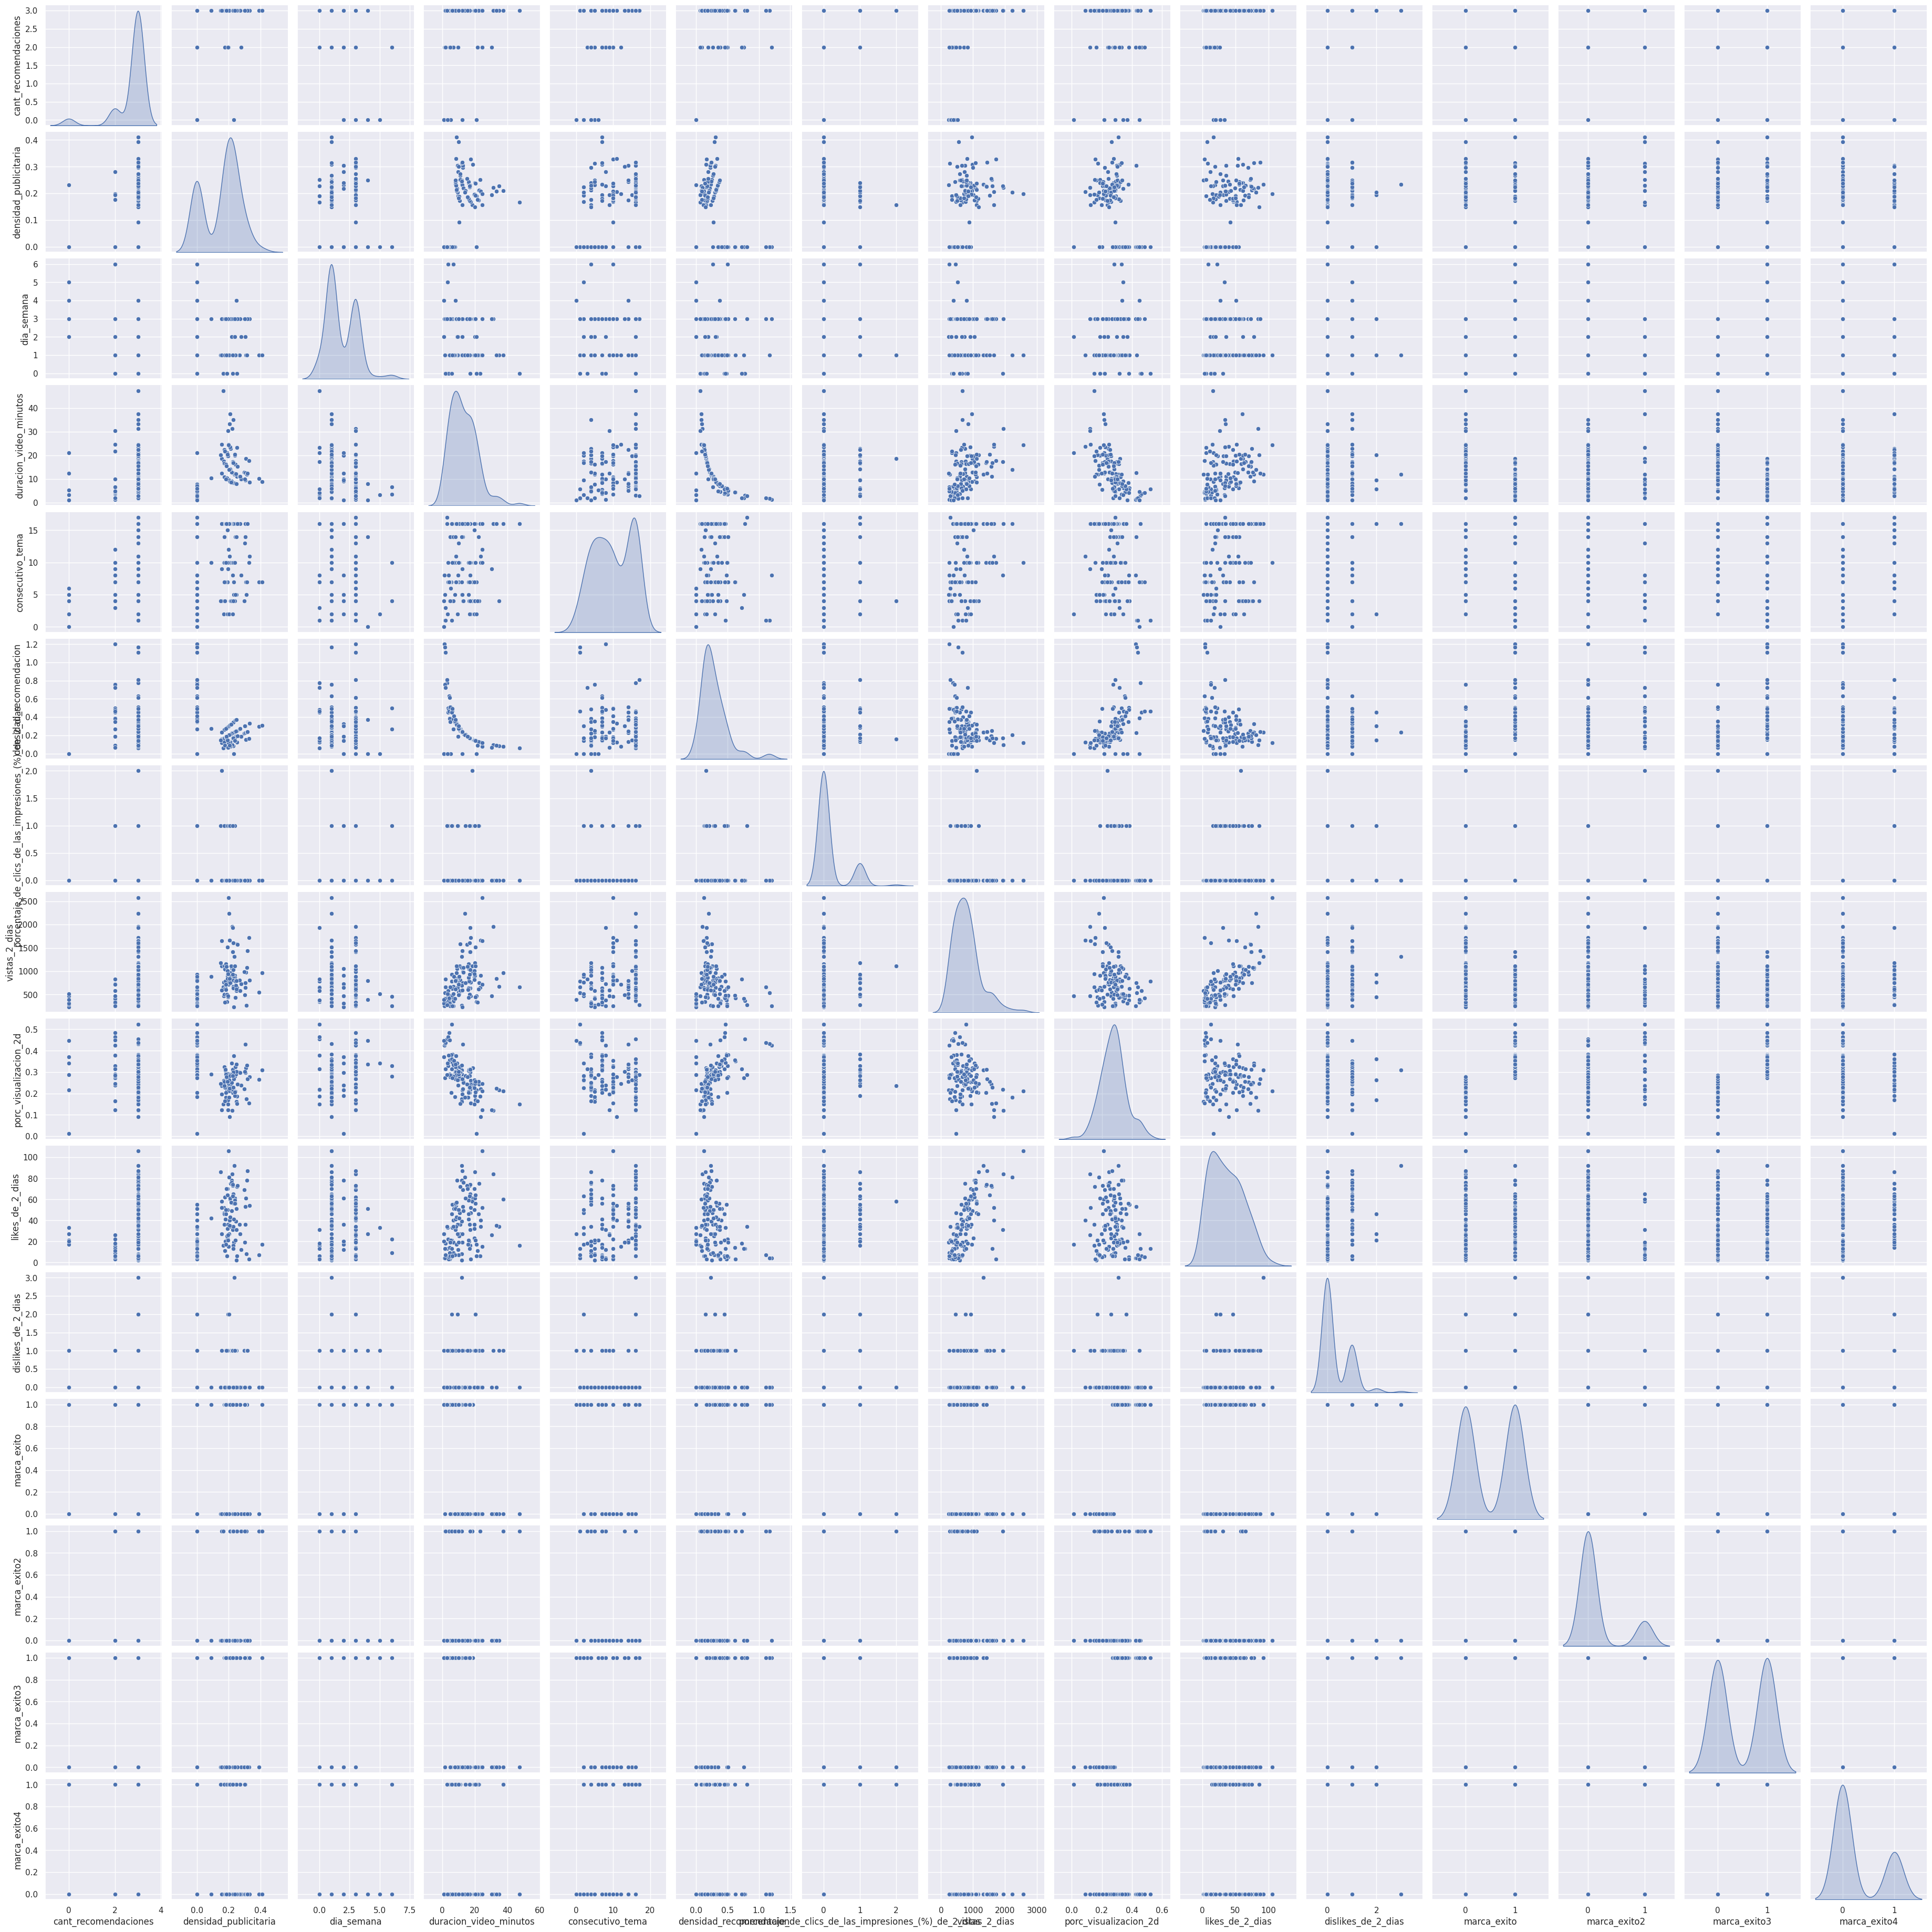

In [36]:
#Pairplot
sns.pairplot(data=df_Apriori_Scatter_final, diag_kind="kde");

In [37]:
fig = px.scatter_matrix(df_Apriori_Scatter,
    dimensions = df_Apriori_Scatter.columns[:-1],
    color="marca_exito")

fig.update_layout(width=900, height=760, xaxis_tickangle=45, yaxis_tickangle = 50)
fig.update_traces(diagonal_visible=False, showupperhalf=False)
fig.show()

In [38]:
fig = px.scatter_matrix(df_Apriori_Scatter,
    dimensions = df_Apriori_Scatter.columns[:-1],
    color="marca_exito4")

fig.update_layout(width=900, height=760, xaxis_tickangle=45, yaxis_tickangle = 50)
fig.update_traces(diagonal_visible=False, showupperhalf=False)
fig.show()

In [39]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

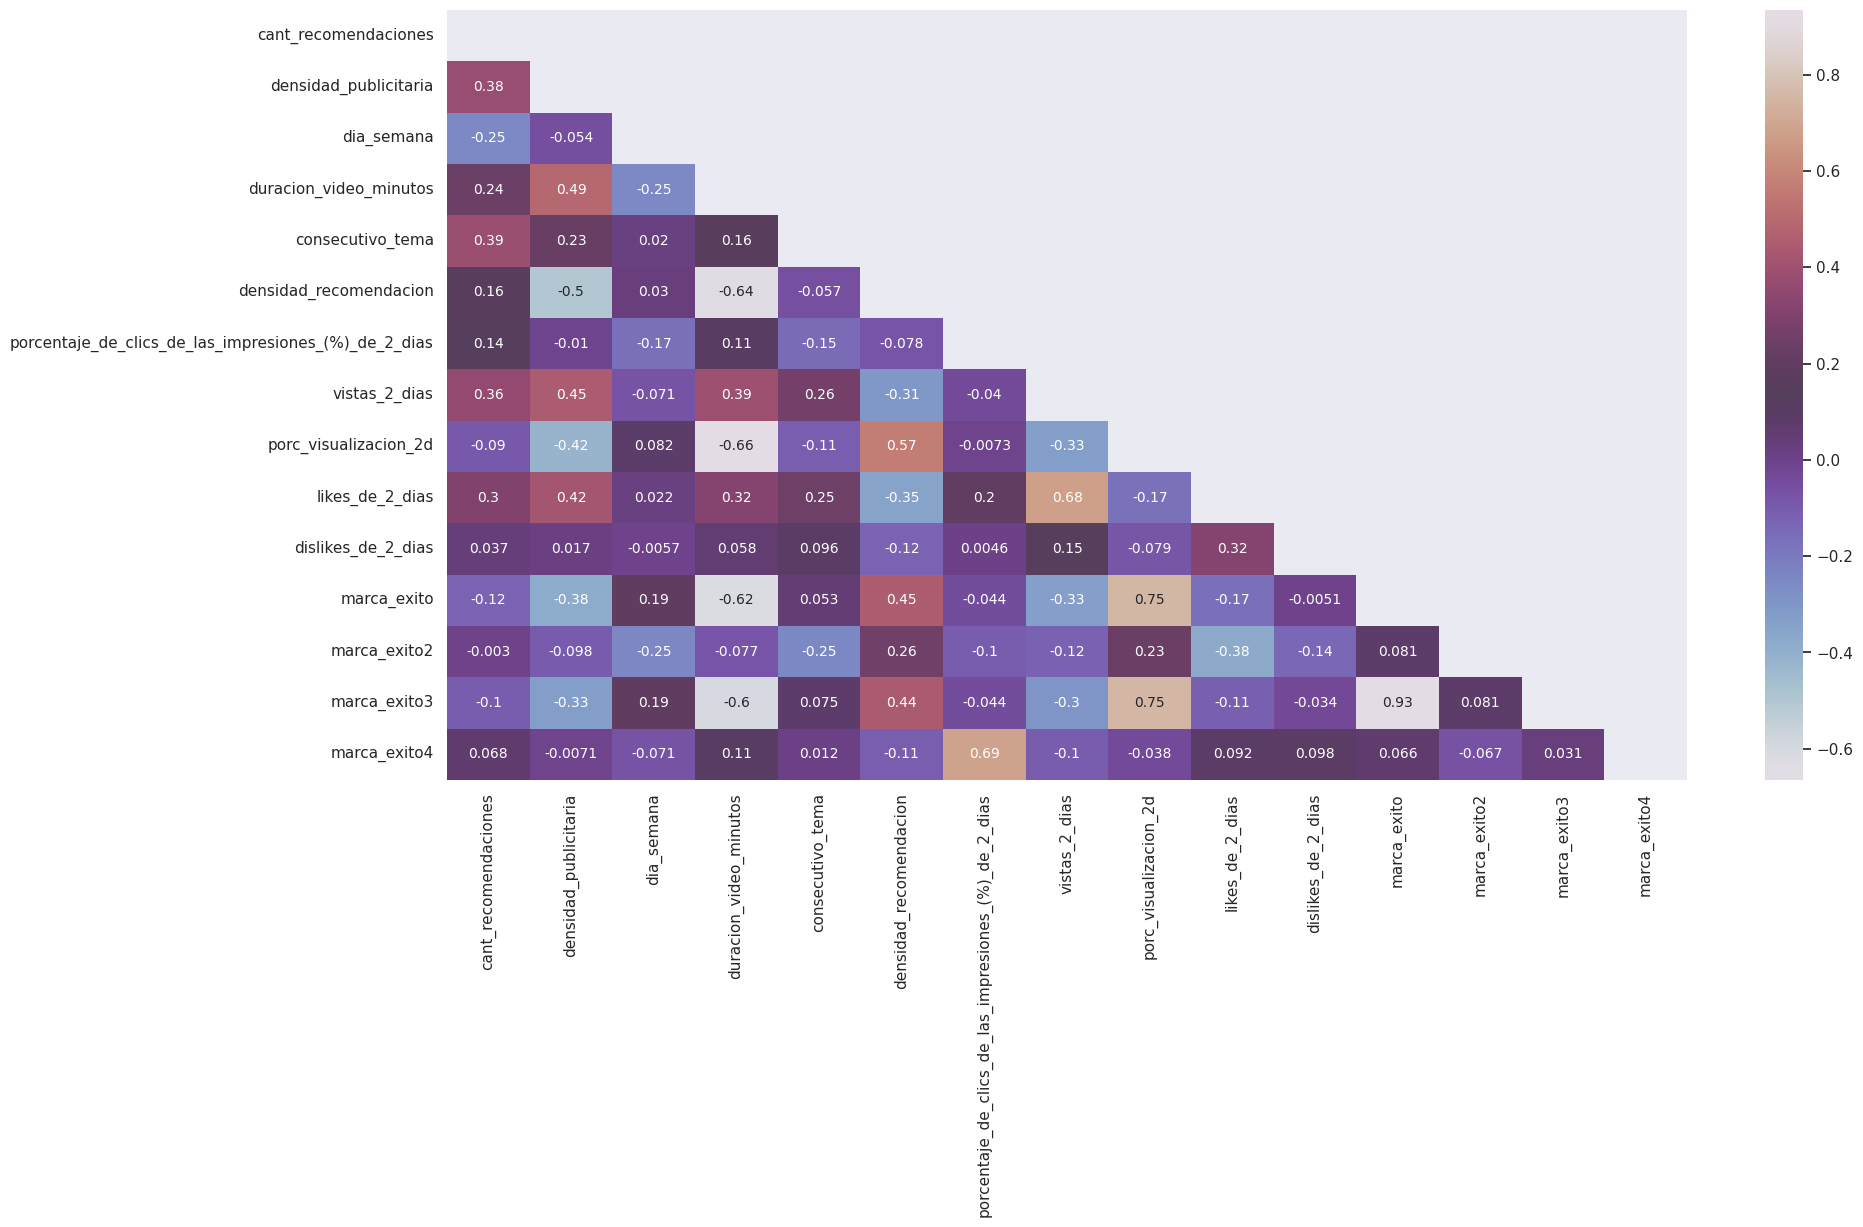

In [40]:
# CORRELACIONES SIMPLES
plt.figure(figsize = (20,10))

corr_df = df_Apriori_Scatter_final.corr(method='pearson')
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,cmap='twilight',annot_kws={"size":10}, square = False, mask = mask, alpha = 0.8)
plt.show()

In [41]:
df = df_Apriori_Scatter_final.groupby(["marca_exito3"]).size().reset_index(name='count')
print(df)

   marca_exito3  count
0             0     61
1             1     62


In [42]:
df.marca_exito3.value_counts()

0    1
1    1
Name: marca_exito3, dtype: int64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7377d29e-ada8-4781-9a6b-60a54a1f06a0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>